## Quantum Part


***

In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

font  = {'family': 'serif',
         'weight': 'normal',
         'size': 11}

In [2]:
nqubits = 5
qubits  = [cirq.GridQubit(0, x) for x in range(nqubits)]

circuit = cirq.Circuit()

# Apply Hadamard operation on every qubit
circuit.append(cirq.H(q) for q in qubits)

# Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
circuit.append(cirq.CNOT(qubits[i], qubits[i+1]) for i in range(nqubits-1))

# SWAP (0, 4)
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

# Rotate X with pi/2
circuit.append(cirq.rx(np.pi/2)(q) for q in qubits)

# Plot the circuit
print(circuit)

                                             ┌─────────┐
(0, 0): ───H───@──────────────────────────────×────────────Rx(0.5π)───
               │                              │
(0, 1): ───H───X───@───Rx(0.5π)───────────────┼───────────────────────
                   │                          │
(0, 2): ───H───────X───@──────────Rx(0.5π)────┼───────────────────────
                       │                      │
(0, 3): ───H───────────X──────────@───────────┼Rx(0.5π)───────────────
                                  │           │
(0, 4): ───H──────────────────────X───────────×────────────Rx(0.5π)───
                                             └─────────┘


### $R_x(\theta)$ rotations for various angles $ \theta $

Theoretical result: $ p_{\theta} = cos^2(\frac{\theta}{2}) $

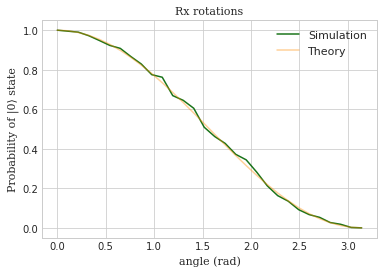

In [3]:
q   = cirq.GridQubit(0,0)
sim = cirq.Simulator()

probs = []
Nr = 1000
for theta in np.linspace(0, np.pi, 30):
    c   = cirq.Circuit(cirq.rx(theta)(q), 
                       cirq.measure(q, key='m'))
    result = sim.run(c, 
                     repetitions=Nr)
    p = result.histogram(key='m').get(0, 0) / Nr
    probs.append(p)
    
    
with plt.style.context('seaborn-whitegrid'):
    
    theta  = np.linspace(0, np.pi, 30)  
    plt.plot(theta, probs, 
             c='darkgreen', alpha=.9, label='Simulation')
    
    # theoretical results 
    probs_ = np.cos(theta/2)**2 
    plt.plot(theta, probs_, 
             c='darkorange', alpha=.4, label='Theory')
    
    
    plt.title('Rx rotations', 
              fontdict=font)
    plt.legend(loc='best', 
               fontsize=11, )
    plt.xlabel('angle (rad)', 
               fontdict=font)
    plt.ylabel('Probability of |0⟩ state', 
               fontdict=font)